# Turboshaft metamodel

In this notebook we will try to create a metamodel to estimate the performances of a turboshaft

In [1]:
import warnings

warnings.filterwarnings(action="ignore")

# Now for the fuel consumed

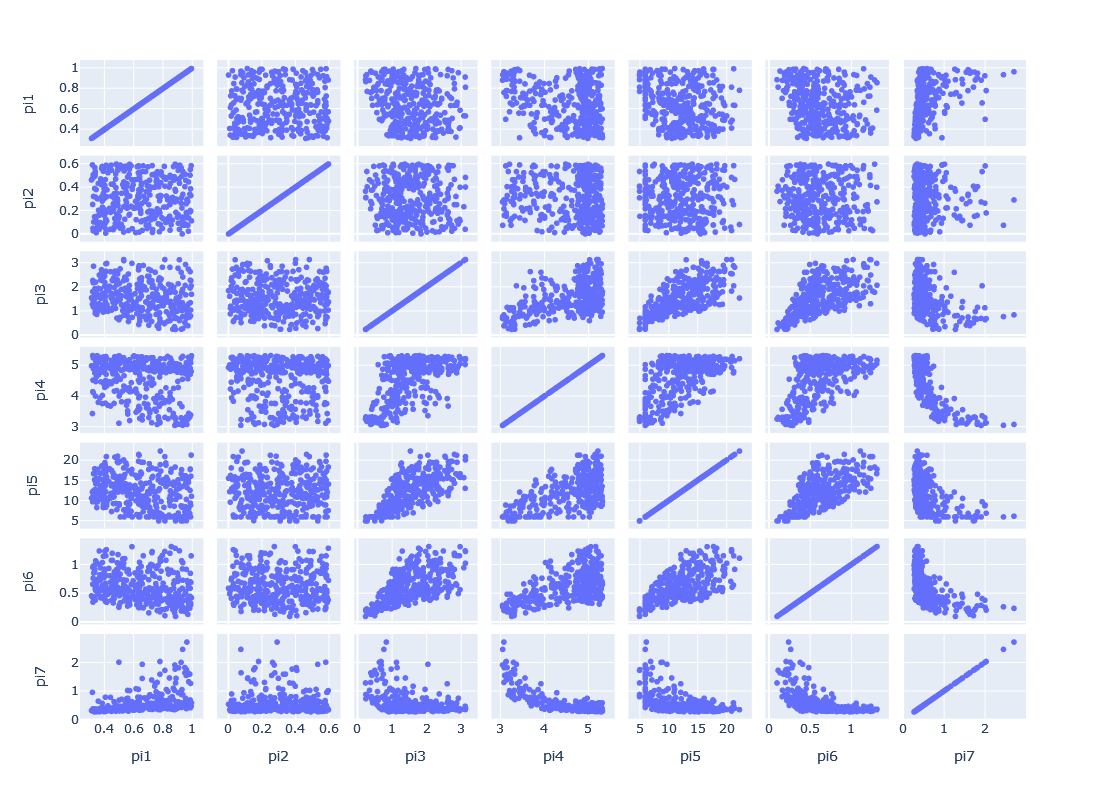

In [36]:
import pathlib
import numpy as np
import pandas as pd
import plotly.express as px

from stdatm import Atmosphere

path_to_current_file = pathlib.Path().cwd()
data_folder_path = path_to_current_file / "data"
result_file_path_max_power = data_folder_path / "fuel_consumed_v2.csv"

existing_data = pd.read_csv(result_file_path_max_power, index_col=0)

altitudes = existing_data["Altitude (ft)"].to_numpy()
machs = existing_data["Mach (-)"].to_numpy()
atm = Atmosphere(altitudes, altitude_in_feet=True)
atm_0 = Atmosphere(0.0, altitude_in_feet=True)
sigmas = atm.density / atm_0.density

index_to_retain = np.arange(0, len(altitudes), 3)

good_results = np.where(existing_data["Fuel mass flow (kg/h)"].to_numpy()[index_to_retain] < 1000.0)[0]

new_atm = Atmosphere(altitudes[index_to_retain][good_results], altitude_in_feet=True)

pi1 = sigmas[index_to_retain][good_results]
pi2 = existing_data["Mach (-)"].to_numpy()[index_to_retain][good_results]
pi3 = existing_data["Design Power (kW)"].to_numpy()[index_to_retain][good_results] / 1000.0
pi4 = existing_data["Design T41t (degK)"].to_numpy()[index_to_retain][good_results] / atm_0.temperature
pi5 = existing_data["Design OPR (-)"].to_numpy()[index_to_retain][good_results]
pi6 = existing_data["Shaft Power (kW)"].to_numpy()[index_to_retain][good_results] / 1000.0
pi7 = existing_data["Fuel mass flow (kg/h)"].to_numpy()[index_to_retain][good_results] / existing_data["Shaft Power (kW)"].to_numpy()[index_to_retain][good_results]
doe_fuel_consumed_limit = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7]
doe_fuel_consumed_limit = pd.DataFrame(
    doe_fuel_consumed_limit, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7"]
)

fig = px.scatter_matrix(doe_fuel_consumed_limit, width=1200, height=800)
fig.show()

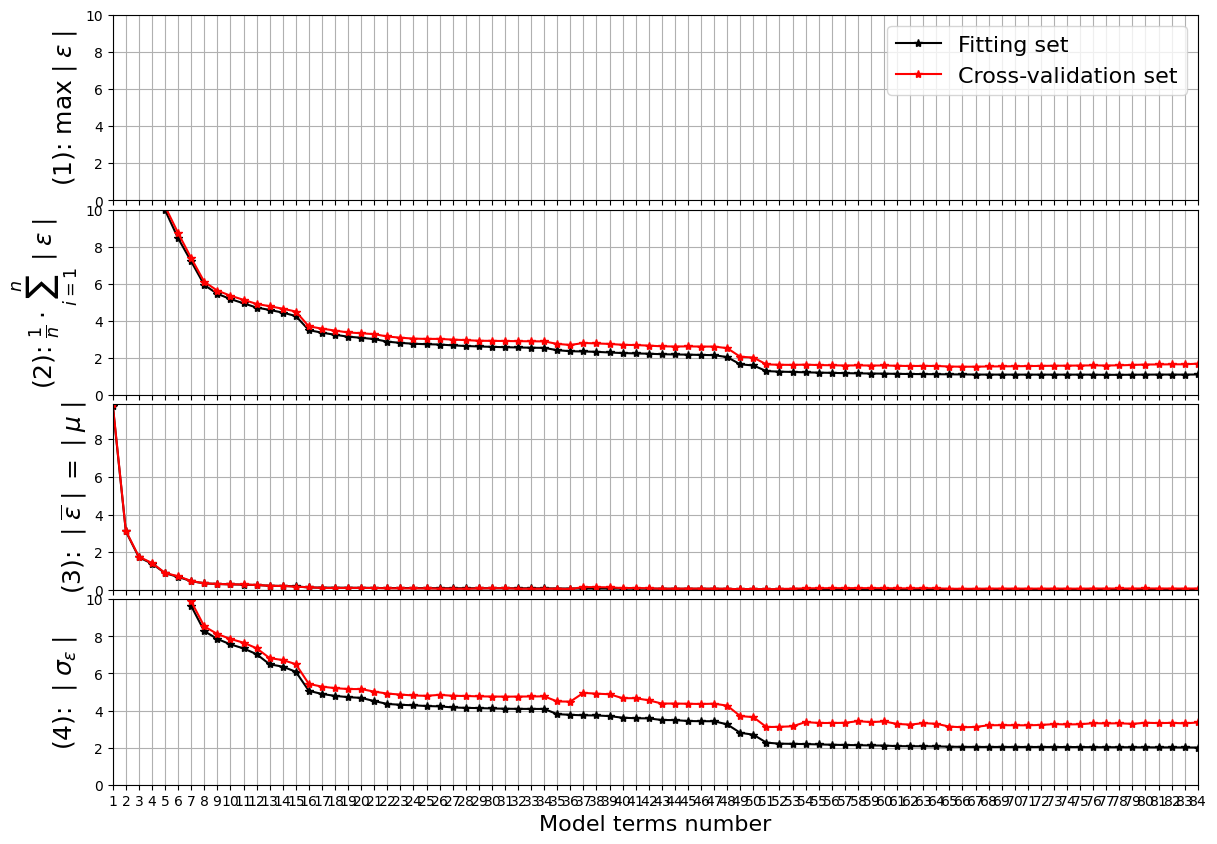

In [38]:
from pyvplm.addon.variablepowerlaw import regression_models, perform_regression

# Fit with 3rd order power-law model the obtained Pi DOE
models = regression_models(
    doe_fuel_consumed_limit.values,
    elected_pi0="pi7",
    order=3,
    log_space=True,
    ymax_axis=10,
    test_mode=True,
    plots=True,
)


Elected model for regression is n°21:


<IPython.core.display.Latex object>

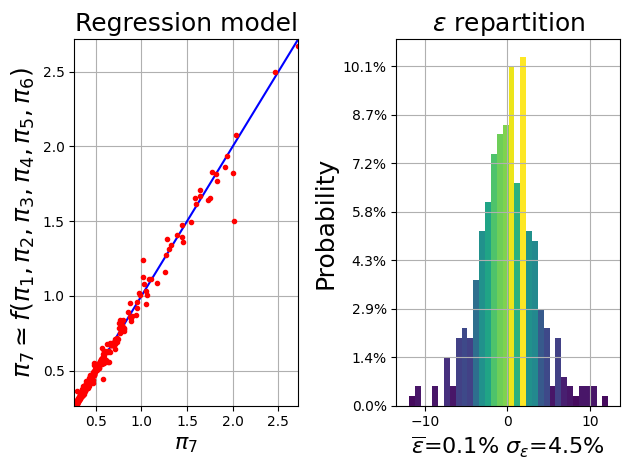

In [39]:
_ = perform_regression(doe_fuel_consumed_limit.values, models, chosen_model=21, no_plots=False)

In [41]:
print(models[21])

('log(pi7) = 6.74336-27.96855*log(pi4)+0.63757*log(pi1)-3.22166*log(pi5)*log(pi6)+8.75287*log(pi3)*log(pi4)**2-16.66848*log(pi4)**3+5.33445*log(pi3)-4.51568*log(pi6)-0.10689*log(pi2)-0.45367*log(pi1)*log(pi6)+1.02829*log(pi1)**2*log(pi4)-0.98638*log(pi1)**2*log(pi3)+15.58391*log(pi4)*log(pi5)*log(pi6)+36.93294*log(pi4)**2-23.66095*log(pi4)**2*log(pi6)-3.39371*log(pi5)**2*log(pi6)-0.01266*log(pi2)**2*log(pi5)-0.28533*log(pi3)**2*log(pi6)+0.12388*log(pi2)*log(pi4)**2-13.26902*log(pi3)*log(pi4)+16.30253*log(pi4)*log(pi6)', array([ 6.74335550e+00, -2.79685456e+01,  6.37572474e-01, -3.22165542e+00,
        8.75287471e+00, -1.66684835e+01,  5.33444650e+00, -4.51567510e+00,
       -1.06894244e-01, -4.53665398e-01,  1.02828976e+00, -9.86382266e-01,
        1.55839057e+01,  3.69329400e+01, -2.36609492e+01, -3.39370788e+00,
       -1.26614030e-02, -2.85331147e-01,  1.23880944e-01, -1.32690183e+01,
        1.63025258e+01]),                   0
max |e|   25.385924
ave. |e|   3.017666
ave. e     0.

In [ ]:
print(min(existing_data["Fuel mass flow (kg/h)"].to_numpy()))
print(max(existing_data["Fuel mass flow (kg/h)"].to_numpy()))

Now for the exhaust thrust

In [ ]:
import pathlib
import numpy as np
import pandas as pd
from stdatm import Atmosphere

path_to_current_file = pathlib.Path().cwd()
data_folder_path = path_to_current_file / "data"
result_file_path_max_power = data_folder_path / "fuel_consumed.csv"

existing_data = pd.read_csv(result_file_path_max_power, index_col=0)

altitudes = existing_data["Altitude (ft)"].to_numpy()
machs = existing_data["Mach (-)"].to_numpy()
atm = Atmosphere(altitudes, altitude_in_feet=True)
atm_0 = Atmosphere(0.0, altitude_in_feet=True)
sigmas = atm.density / atm_0.density

index_to_retain = np.random.randint(0, len(altitudes), size=750)
exhaust_thrust = existing_data["Exhaust Thrust (N)"].to_numpy()[index_to_retain]
# only taking positive value of exhaust thrust
new_index = np.where(exhaust_thrust > 0)

pi1 = sigmas[index_to_retain][new_index]
pi2 = existing_data["Mach (-)"].to_numpy()[index_to_retain][new_index]
pi3 = existing_data["Design Power (kW)"].to_numpy()[index_to_retain][new_index]
pi4 = existing_data["Design T41t (degK)"].to_numpy()[index_to_retain][new_index]
pi5 = existing_data["Design OPR (-)"].to_numpy()[index_to_retain][new_index]
pi6 = existing_data["Shaft Power (kW)"].to_numpy()[index_to_retain][new_index]
pi7 = existing_data["Exhaust Thrust (N)"].to_numpy()[index_to_retain][new_index]
doe_exhaust_thrust = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7]
doe_exhaust_thrust = pd.DataFrame(
    doe_exhaust_thrust, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7"]
)

# Fit with 3rd order power-law model the obtained Pi DOE
# models = regression_models(
#     doe_exhaust_thrust.values, elected_pi0="pi7", order=4, log_space=True, ymax_axis=10, test_mode=True, plots=True
# )

In [ ]:
# _ = perform_regression(doe_exhaust_thrust.values, models, chosen_model=30, no_plots=False)

In [ ]:
import plotly.express as px

fig = px.scatter_matrix(doe_exhaust_thrust, width=1200, height=800)
fig.show()

# Exhaust thrust but differently

In [ ]:
import pathlib
import numpy as np
import pandas as pd
from stdatm import Atmosphere

# Import pyVPLM modules/functions
from pyvplm.addon.variablepowerlaw import regression_models, perform_regression

path_to_current_file = pathlib.Path().cwd()
data_folder_path = path_to_current_file / "data"
result_file_path_max_power = data_folder_path / "fuel_consumed_complemented.csv"

existing_data = pd.read_csv(result_file_path_max_power, index_col=0)

altitudes = existing_data["Altitude (ft)"].to_numpy()
machs = existing_data["Mach (-)"].to_numpy()
atm = Atmosphere(altitudes, altitude_in_feet=True)
atm_0 = Atmosphere(0.0, altitude_in_feet=True)
sigmas = atm.density / atm_0.density

index_to_retain = np.random.randint(0, len(altitudes), size=750)

pi1 = sigmas[index_to_retain]
pi2 = existing_data["Mach (-)"].to_numpy()[index_to_retain]
pi3 = existing_data["Design Power (kW)"].to_numpy()[index_to_retain]
pi4 = existing_data["Design T41t (degK)"].to_numpy()[index_to_retain]
pi5 = existing_data["Design OPR (-)"].to_numpy()[index_to_retain]
pi6 = existing_data["Shaft Power (kW)"].to_numpy()[index_to_retain]
pi7 = existing_data["Exhaust velocity (m/s)"].to_numpy()[index_to_retain]

doe_exhaust_velocity = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7]
doe_exhaust_velocity = pd.DataFrame(
    doe_exhaust_velocity, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7"]
)

# Fit with 3rd order power-law model the obtained Pi DOE
models = regression_models(
    doe_exhaust_velocity.values,
    elected_pi0="pi7",
    order=3,
    log_space=True,
    ymax_axis=10,
    test_mode=True,
    plots=True,
)

In [ ]:
_ = perform_regression(doe_exhaust_velocity.values, models, chosen_model=15, no_plots=False)

In [ ]:
import pathlib
import numpy as np
import pandas as pd
from stdatm import Atmosphere

# Import pyVPLM modules/functions
from pyvplm.addon.variablepowerlaw import regression_models, perform_regression

path_to_current_file = pathlib.Path().cwd()
data_folder_path = path_to_current_file / "data"
result_file_path_max_power = data_folder_path / "fuel_consumed_complemented.csv"

existing_data = pd.read_csv(result_file_path_max_power, index_col=0)

altitudes = existing_data["Altitude (ft)"].to_numpy()
machs = existing_data["Mach (-)"].to_numpy()
atm = Atmosphere(altitudes, altitude_in_feet=True)
atm_0 = Atmosphere(0.0, altitude_in_feet=True)
sigmas = atm.density / atm_0.density

index_to_retain = np.random.randint(0, len(altitudes), size=750)

pi1 = sigmas[index_to_retain]
pi2 = existing_data["Mach (-)"].to_numpy()[index_to_retain]
pi3 = existing_data["Design Power (kW)"].to_numpy()[index_to_retain]
pi4 = existing_data["Design T41t (degK)"].to_numpy()[index_to_retain]
pi5 = existing_data["Design OPR (-)"].to_numpy()[index_to_retain]
pi6 = existing_data["Shaft Power (kW)"].to_numpy()[index_to_retain]
pi7 = existing_data["Exhaust mass flow (kg/s)"].to_numpy()[index_to_retain]

doe_exhaust_mass_flow = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7]
doe_exhaust_mass_flow = pd.DataFrame(
    doe_exhaust_mass_flow, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7"]
)

# Fit with 3rd order power-law model the obtained Pi DOE
models = regression_models(
    doe_exhaust_mass_flow.values,
    elected_pi0="pi7",
    order=2,
    log_space=True,
    ymax_axis=10,
    test_mode=True,
    plots=True,
)

In [ ]:
_ = perform_regression(doe_exhaust_mass_flow.values, models, chosen_model=10, no_plots=False)

# Max power OPT and ITT reversed

I turns out, the original orientation of the model wasn't what we needed. What we need is a way to derive, from the power seen during the mission, what the minimum thermodynamic design power would be that allow to reach that power, hence why we'll reverse the model.

In [ ]:
import pathlib
import numpy as np
import pandas as pd
from stdatm import Atmosphere

# Import pyVPLM modules/functions
from pyvplm.addon.variablepowerlaw import regression_models, perform_regression

path_to_current_file = pathlib.Path().cwd()
data_folder_path = path_to_current_file / "data"
result_file_path_max_power = data_folder_path / "max_power_v2.csv"

existing_data = pd.read_csv(result_file_path_max_power, index_col=0)

altitudes = existing_data["Altitude (ft)"].to_numpy()
machs = existing_data["Mach (-)"].to_numpy()
atm = Atmosphere(altitudes, altitude_in_feet=True)
atm_0 = Atmosphere(0.0, altitude_in_feet=True)
sigmas = atm.density / atm_0.density

pi1 = list(sigmas)
pi2 = existing_data["Mach (-)"].to_list()
pi3 = existing_data["Max Power OPR Limit (kW)"].to_numpy() / 1000.0
pi4 = existing_data["Design T41t (degK)"].to_numpy() / atm_0.temperature
pi5 = existing_data["Design OPR (-)"].to_list()
pi6 = existing_data["Limit OPR (-)"].to_list()
pi7 = existing_data["Design Power (kW)"].to_numpy() / 1000.0
doe_opr_limit = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7]
doe_opr_limit = pd.DataFrame(
    doe_opr_limit, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7"]
)

# Fit with 3rd order power-law model the obtained Pi DOE
models = regression_models(
    doe_opr_limit.values,
    elected_pi0="pi7",
    order=3,
    log_space=True,
    ymax_axis=10,
    test_mode=True,
    plots=True,
)

In [ ]:
surrogate = perform_regression(doe_opr_limit.values, models, chosen_model=21, no_plots=False)

In [ ]:
import pathlib
import numpy as np
import pandas as pd
from stdatm import Atmosphere
import plotly.express as px

# Import pyVPLM modules/functions
from pyvplm.addon.variablepowerlaw import regression_models, perform_regression

path_to_current_file = pathlib.Path().cwd()
data_folder_path = path_to_current_file / "data"
result_file_path_max_power = data_folder_path / "max_power_v2.csv"

existing_data = pd.read_csv(result_file_path_max_power, index_col=0)

altitudes = existing_data["Altitude (ft)"].to_numpy()
machs = existing_data["Mach (-)"].to_numpy()
atm = Atmosphere(altitudes, altitude_in_feet=True)
atm_0 = Atmosphere(0.0, altitude_in_feet=True)
sigmas = atm.density / atm_0.density

pi1 = list(sigmas)
pi2 = existing_data["Mach (-)"].to_list()
pi3 = existing_data["Max Power ITT Limit (kW)"].to_numpy() / 1000.0
pi4 = existing_data["Design T41t (degK)"].to_numpy() / atm_0.temperature
pi5 = existing_data["Design OPR (-)"].to_list()
pi6 = existing_data["Limit ITT (degK)"].to_numpy() / atm_0.temperature
pi7 = existing_data["Design Power (kW)"].to_numpy() / 1000.0
doe_itt_limit = np.c_[pi1, pi2, pi3, pi4, pi5, pi6, pi7]
doe_itt_limit = pd.DataFrame(
    doe_itt_limit, columns=["pi1", "pi2", "pi3", "pi4", "pi5", "pi6", "pi7"]
)

fig = px.scatter_matrix(doe_itt_limit, width=1200, height=800)
fig.show()

In [ ]:
# Fit with 3rd order power-law model the obtained Pi DOE
models = regression_models(
    doe_itt_limit.values,
    elected_pi0="pi7",
    order=3,
    log_space=True,
    ymax_axis=10,
    test_mode=True,
    plots=True,
)

In [ ]:
surrogate = perform_regression(doe_itt_limit.values, models, chosen_model=21, no_plots=False)